<a href="https://colab.research.google.com/github/adiboy-coder/CODEALPHA-INTERNSHIP-TASK-1/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris Flower Classification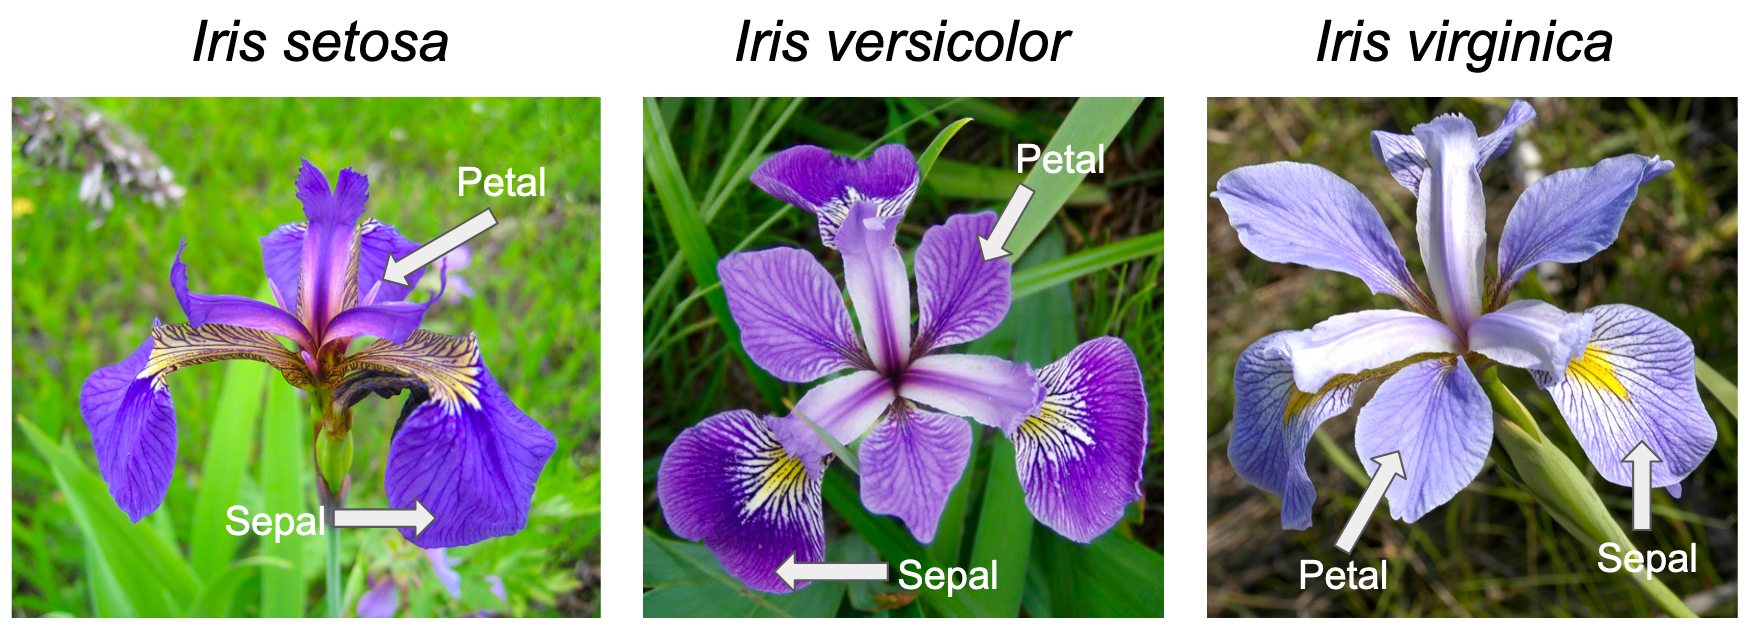**

In [ ]:
#libraries for Analysis and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Training/testing, Model selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#For Evaluating Model Performance
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import classification_report

In [ ]:
# Read the Iris dataset and show the first 5 rows
df = pd.read_csv("Iris.csv")
df.head(5)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
# It gives the Last 5 rows of dataset
df.tail(5)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [ ]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape



(150, 6)

In [ ]:
# Descriptive statistics summary of a given dataset
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [ ]:
# To find null values in dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

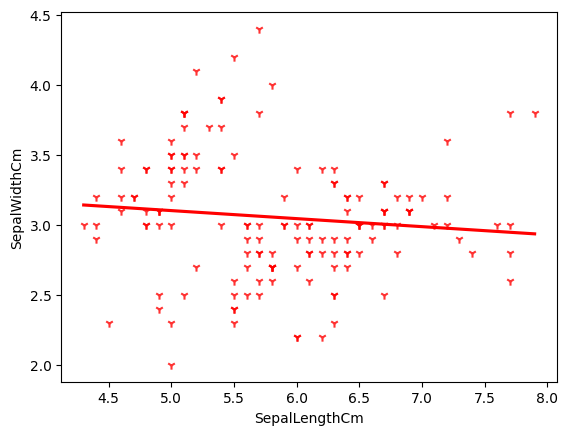

In [ ]:
# plt.scatter(x=df['SepalLengthCm'], y=df["SepalWidthCm"], c="r", s=27, marker="1")

sns.regplot(data = df, x = df['SepalLengthCm'], y = df["SepalWidthCm"], ci = None, marker="1", color="red")
plt.show()

<Axes: >

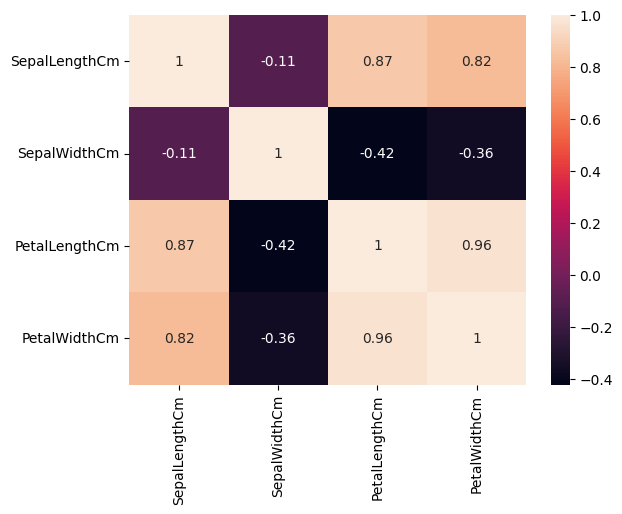

In [ ]:
#Correlation between features
numeric_df = df.drop(columns=['Species'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)

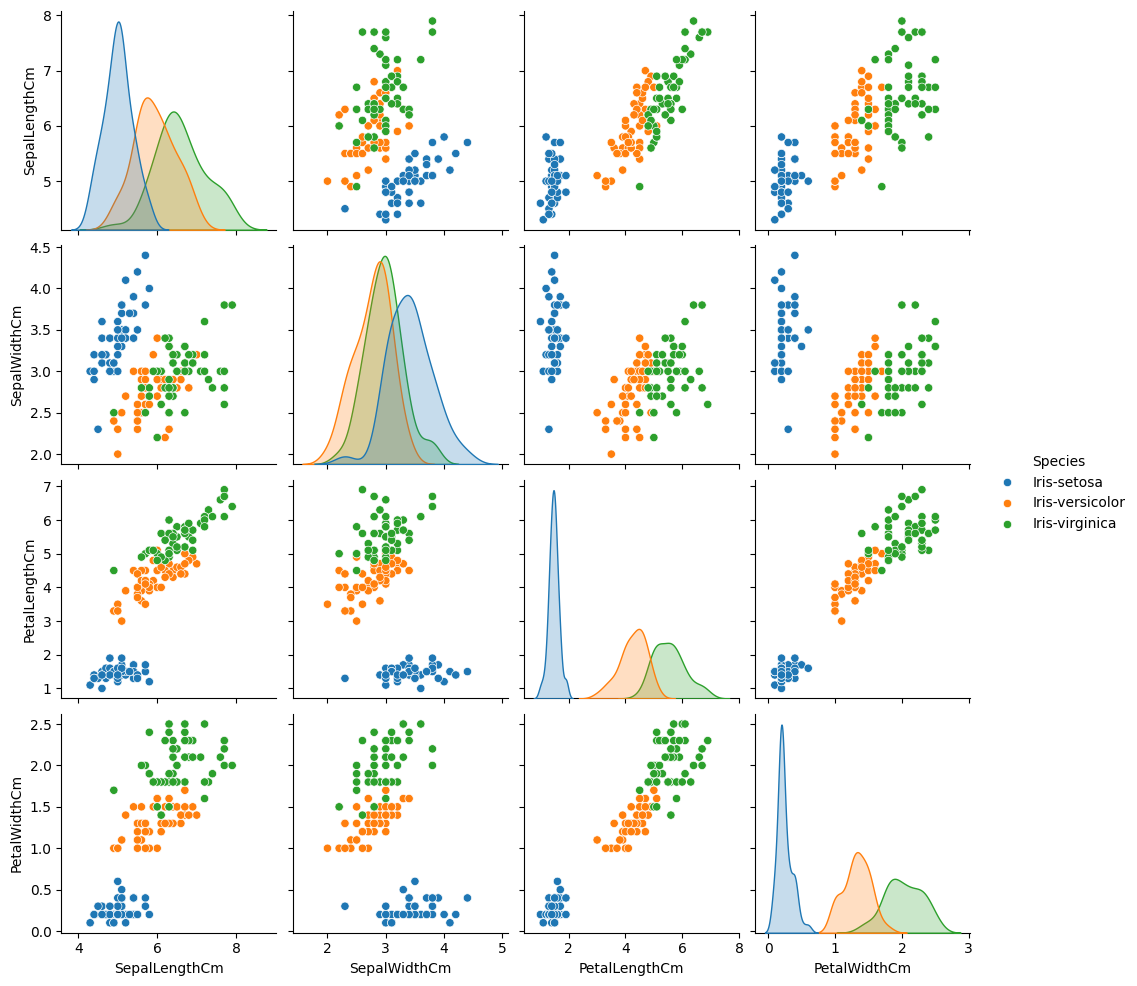

In [ ]:
#pairplot is used for exploring the relationships between multiple variables in a dataset.
sns.pairplot(df, hue='Species')

In [ ]:
#Spliting the data into training and testing
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
df.shape

(150, 5)

In [ ]:
# to check how much data split into training and testing
print("X:",X_train.shape,X_test.shape)
print("y:",y_train.shape,y_test.shape)

X: (120, 4) (30, 4)
y: (120,) (30,)


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# Support Vector Machine

svm = SVC()
svm.fit(X_train,y_train)

pred = svm.predict(X_test)
print(accuracy_score(y_test,pred))

1.0


In [ ]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
new_data = np.array([[6.7,	3.0,	3.2, 2]])
prediction = model.predict(new_data)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-versicolor']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
